## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [8]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [9]:
df_ab_data = pd.read_csv("C:\\Users\\patri\\Desktop\\Udacity\\Project3\\AnalyzeABTestResults 2\\ab_data.csv")
df_ab_data.head(10)

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1
5,936923,2017-01-10 15:20:49.083499,control,old_page,0
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1
7,719014,2017-01-17 01:48:29.539573,control,old_page,0
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1


b. Use the below cell to find the number of rows in the dataset.

In [10]:
# calculate the row count
ab_data_rows = len(df_ab_data.index)
# format the output (two lines for better readability in the pdf export)
output = 'The row count for the ab_data dataset '
output = output + 'is %s.' % (ab_data_rows)
# print the formatted output
print(output)

The row count for the ab_data dataset is 294478.


c. The number of unique users in the dataset.

In [11]:
# count unique users
unique_users = len(df_ab_data.groupby('user_id'))
# format the output (two lines for better readability in the pdf export)
output = 'The count of unique users for the ab_data dataset '
output = output + 'is %s.' % (unique_users)
# print the formatted output
print(output)

The count of unique users for the ab_data dataset is 290584.


d. The proportion of users converted.

In [12]:
unique_converted_users = len(df_ab_data[df_ab_data["converted"]==1].groupby('user_id'))
# format the output (two lines for better readability in the pdf export)
output = 'The proportion of users converted '
# divide the converted unique user count by the total unique user count
output = output + 'is %s.' % (unique_converted_users/unique_users)
# print the formatted output
print(output)

The proportion of users converted is 0.12104245244060237.


e. The number of times the `new_page` and `treatment` don't line up.

In [13]:
# 'dont lineup' means all rows minus those where they lineup
no_line_up_treatment = len(df_ab_data[(df_ab_data["group"]=='treatment') 
                    & (df_ab_data["landing_page"]=='old_page')])
no_line_up_control =  len(df_ab_data[(df_ab_data["group"]=='control') 
                    & (df_ab_data["landing_page"]=='new_page')])
# format the output (two lines for better readability in the pdf export)
output = 'The number of times the new_page and treatment dont lineup '
output = output + 'is %s.' % (no_line_up_treatment + no_line_up_control)
# print the formatted output
print(output)

The number of times the new_page and treatment dont lineup is 3893.


f. Do any of the rows have missing values?

In [14]:
df_ab_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


All columns have 294478 non-null values which is equal to the total row count. This means no columns have missing values.

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [15]:
# select only the rows where treatment is aligned with new_page
df2 = df_ab_data[((df_ab_data['group'] == 'treatment') == 
                  (df_ab_data['landing_page'] == 'new_page')) == True]

In [16]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [17]:
# count unique users
unique_users = len(df2.groupby('user_id'))
# format the output (two lines for better readability in the pdf export)
output = 'The count of unique users for the ab_data dataset '
output = output + 'is %s.' % (unique_users)
# print the formatted output
print(output)

The count of unique users for the ab_data dataset is 290584.


b. There is one **user_id** repeated in **df2**.  What is it?

In [18]:
df2.groupby(['user_id'])['group'].count().nlargest(1)

user_id
773192    2
Name: group, dtype: int64

c. What is the row information for the repeat **user_id**? 

In [19]:
df2[df2['user_id'] == 773192]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [20]:
df2=df2.drop(1899)

`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [21]:
unique_converted_users = len(df2[df2["converted"]==1].groupby('user_id'))
# format the output (two lines for better readability in the pdf export)
output = 'The probability of an individual converting regardless of the page they receive '
# divide the converted unique user count by the total unique user count
output = output + 'is %s.' % (unique_converted_users/unique_users)
# print the formatted output
print(output)

The probability of an individual converting regardless of the page they receive is 0.11959708724499628.


b. Given that an individual was in the `control` group, what is the probability they converted?

In [22]:
unique_converted_control_group_users = len(df2[(df2["group"]=='control') & 
                                                 (df2["converted"]==1)].groupby('user_id'))
unique_control_group_users = len(df2[df2["group"]=='control'].groupby('user_id'))
# format the output (two lines for better readability in the pdf export)
output = 'Given that an individual was in the control group, the probability '
# divide the converted unique treatment user count by the total unique treatment user count
output = output + 'that he converted is %s.' % (unique_converted_control_group_users/unique_control_group_users)
# print the formatted output
print(output)

Given that an individual was in the control group, the probability that he converted is 0.1203863045004612.


c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [23]:
unique_converted_treatment_group_users = len(df2[(df2["group"]=='treatment') & 
                                                 (df2["converted"]==1)].groupby('user_id'))
unique_treatment_group_users = len(df2[df2["group"]=='treatment'].groupby('user_id'))
# format the output (two lines for better readability in the pdf export)
output = 'Given that an individual was in the treatment group, the probability '
# divide the converted unique treatment user count by the total unique treatment user count
output = output + 'that he converted is %s.' % (unique_converted_treatment_group_users/unique_treatment_group_users)
# print the formatted output
print(output)

Given that an individual was in the treatment group, the probability that he converted is 0.11880806551510564.


d. What is the probability that an individual received the new page?

In [24]:
unique_newpage_users = len(df2[df2["landing_page"]=='new_page'].groupby('user_id'))
# format the output (two lines for better readability in the pdf export)
output = 'The probability that an individual received the new page '
# divide the converted unique newpage user count by the total unique user count
output = output + 'is %s.' % (unique_newpage_users/unique_users)
# print the formatted output
print(output)

The probability that an individual received the new page is 0.5000619442226688.


e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

Comparing the probability of a user to convert given he was in the control group to given he was in the treatment group shows that being in the control group results in a slightly higher probability of converting. It is certainly not evident that the new treatment page leads to more conversions.

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

$$
H_0: p_{new} - p_{old} \leq 0 \\\
H_1: p_{new} - p_{old} > 0
$$

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [25]:
p_new = df2['converted'].mean()
p_new

0.11959708724499628

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [26]:
p_old = df2['converted'].mean()
p_old

0.11959708724499628

c. What is $n_{new}$?

In [27]:
df_treatment = df2.query('group == "treatment"')
n_new = df_treatment.shape[0]
n_new

145310

d. What is $n_{old}$?

In [28]:
df_control = df2.query('group == "control"')
n_old = df_control.shape[0]
n_old

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [29]:
new_page_converted = np.random.binomial(1, p_new, n_new)
new_page_converted

array([0, 0, 1, ..., 0, 0, 1])

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [30]:
old_page_converted = np.random.binomial(1, p_new, n_old)
old_page_converted

array([0, 0, 0, ..., 1, 0, 0])

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [31]:
# difference in conversion rate
diff = new_page_converted.mean() - old_page_converted.mean()
diff

0.0008857594602851154

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [32]:
p_diffs = []
for _ in range(10000):
    old_page_converted = np.random.binomial(1, p_old, n_old)
    old_page_mean = old_page_converted.mean()
    new_page_converted = np.random.binomial(1, p_new, n_new)
    new_page_mean = new_page_converted.mean()
    p_diffs.append(new_page_mean - old_page_mean)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

(array([  29.,  157.,  754., 1969., 3081., 2454., 1194.,  318.,   38.,
           6.]),
 array([-0.00435206, -0.00342152, -0.00249099, -0.00156045, -0.00062991,
         0.00030062,  0.00123116,  0.0021617 ,  0.00309223,  0.00402277,
         0.00495331]),
 <a list of 10 Patch objects>)

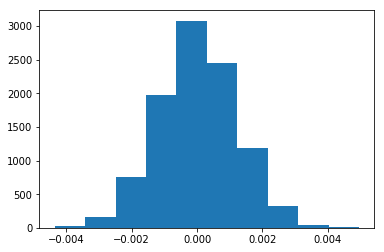

In [33]:
plt.hist(p_diffs)

The distribution seems to be more or less normally distributed. Increasing the value count should result in a more and more normally distributed plot.

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [34]:
control_converted = df2.query('group == "control"')['converted'].mean()
treatment_converted = df2.query('group == "treatment"')['converted'].mean()
diff = treatment_converted - control_converted
diff

-0.0015782389853555567

In [35]:
# avoid type error
p_diffs = np.array(p_diffs)
# compute the p value
pvalue = (p_diffs > diff).mean()
pvalue

0.9086

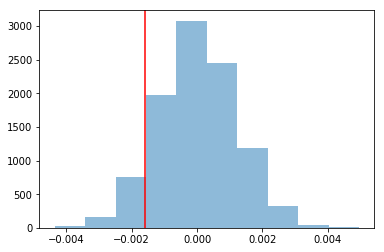

In [36]:
# plot the distribution and a vertical line for the observed difference
plt.hist(p_diffs, alpha=.5)
plt.axvline(x=diff, color='red');

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

I computed the actual difference from the dataset between the control group conversion rate and the treatment group conversion rate.

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [37]:
import statsmodels.api as sm

convert_old = df2.query('group == "control" and converted == 1').shape[0]
convert_new = df2.query('group == "treatment" and converted == 1').shape[0]
n_old = df_control.shape[0]
n_new = df_treatment.shape[0]

# format the output (two lines for better readability in the pdf export)
output = 'The results are '
# divide the converted unique treatment user count by the total unique treatment user count
output = output + '%s / %s / %s / %s.' % (convert_old, convert_new, n_old, n_new)
# print the formatted output
print(output)

The results are 17489 / 17264 / 145274 / 145310.


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [38]:
z_score, p_value = sm.stats.proportions_ztest([convert_old, convert_new], 
                                              [n_old, n_new], alternative='smaller')
z_score, p_value
# format the output (two lines for better readability in the pdf export)
output = 'The results are '
# divide the converted unique treatment user count by the total unique treatment user count
output = output + '%s for the z-score and %s for the p-value.' % (z_score, p_value)
# print the formatted output
print(output)

The results are 1.3109241984234394 for the z-score and 0.9050583127590245 for the p-value.


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

Since 0.905 > 0.05 we can not reject the null hypothesis. That means the old_page is overall the same or better than the new_page. 
The ztest gives a p-value of 0.9051 and with the simulation the p_value was 0.9058. It is fair to say that the z-test agrees with the simulation findings.

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

I would use a logistic regression model here. The conversion rate serves as a categorical dependent variable with only two outcomes (0 or 1).

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [39]:
# dummies for the group column
df2[['group_1', 'group_2' ]] = pd.get_dummies(df2.group)
# dummies for the landing_page column
df2[['lp1', 'lp2' ]] = pd.get_dummies(df2.landing_page)
# rename to the required names
df2 = df2.rename(columns={'group_2': 'ab_page', 'lp1': 'treatment'})
# drop unnecessary columns
df2 = df2.drop(['timestamp','group',  'landing_page', 'lp2', 'group_1', 'treatment'], axis=1)
# adding the intercept column
df2['intercept'] = 1
df2.head(10)

,user_id,converted,ab_page,intercept
0,851104,0,0,1
1,804228,0,0,1
2,661590,0,1,1
3,853541,0,1,1
4,864975,1,0,1
5,936923,0,0,1
6,679687,1,1,1
7,719014,0,0,1
8,817355,1,1,1
9,839785,1,1,1


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [40]:
log_mod = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])
results = log_mod.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Sat, 18 May 2019   Pseudo R-squ.:               8.077e-06
Time:                        15:28:27   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [41]:
# Exponentiate the intercept and the ab_page coefficient
# Also i want to add 1/np.exp because they are negative
1/np.exp(-1.9888), 1/np.exp(-0.0150)

(7.3067603868728614, 1.015113064615719)

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

The p-value according to the logistic regression summary is 0.190.
The goal in part II was simply to prove that the alternate hypothesis is true and that we can reject the null hypothesis. It was only a one-sided test that only looks at one tail of the distribution. In part III we are looking at both tails, that is why the p-value differs.

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

One possibility would be to include the timestamp column to see the conversion rates over time and if this has an effect. This possibility was also stated in the above sections. Adding more variables is also risky because a covariance of multiple variables gets more likely.

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [42]:
countries_df = pd.read_csv('C:\\Users\\patri\\Desktop\\Udacity\\Project3\\AnalyzeABTestResults 2\\countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')
df_new.head(2)

,country,converted,ab_page,intercept
user_id,,,,
834778,UK,0,0,1
928468,US,0,1,1


In [43]:
df_new.country.unique()

array(['UK', 'US', 'CA'], dtype=object)

In [44]:
df_new[['CA', 'UK', 'US']] = pd.get_dummies(df_new['country'])
df_new = df_new.drop(['country', 'CA'], axis=1)

In [45]:
df_new.head()

,converted,ab_page,intercept,UK,US
user_id,,,,,
834778,0,0,1,1,0
928468,0,1,1,0,1
822059,1,1,1,1,0
711597,0,0,1,1,0
710616,0,1,1,1,0


In [46]:
log_mod = sm.Logit(df_new['converted'], df_new[['intercept', 'ab_page', 'UK', 'US']])
results = log_mod.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Sat, 18 May 2019   Pseudo R-squ.:               2.323e-05
Time:                        15:28:29   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0300      0.027    -76.249      0.000      -2.082      -1.978
ab_page       -0.0149      0.011     -1.307      0.191      -0.037       0.007
UK             0.0506      0.028      1.784      0.074      -0.005       0.106
US             0.0408      0.027      1.516      0.130      -0.012       0.093
==============================================================================
"""

In [47]:
1/np.exp(-0.0149), np.exp(0.0506), np.exp(0.0408)

(1.0150115583846535, 1.0519020483004984, 1.0416437559600236)

This means that:  
if the user was from the UK conversion is 1.052 times as likely  
if the user was from the US conversion is 1.042 times as likely  
for each 1 unit decrease in new_page, conversion is 1.015 times as likely  
...holding all other variables constant.  
  
All p-values are greater than 0.05. We can not reject the null hypothesis, meaning that the new_page is not significantly better than the old_page.

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [48]:
df_new['UK_ab_page'] = df_new['UK'] * df_new['ab_page']
df_new['US_ab_page'] = df_new['US'] * df_new['ab_page']
df_new = df_new.drop('intercept', axis=1)
df_new.head()

,converted,ab_page,UK,US,UK_ab_page,US_ab_page
user_id,,,,,,
834778,0,0,1,0,0,0
928468,0,1,0,1,0,1
822059,1,1,1,0,1,0
711597,0,0,1,0,0,0
710616,0,1,1,0,1,0


In [49]:
df_new.corr(method='spearman')

,converted,ab_page,UK,US,UK_ab_page,US_ab_page
converted,1.000000,-0.002432,0.001772,-0.000237,0.001827,-0.002563
ab_page,-0.002432,1.000000,-0.002092,0.001216,0.376626,0.734811
UK,0.001772,-0.002092,1.000000,-0.881979,0.653496,-0.423595
US,-0.000237,0.001216,-0.881979,1.000000,-0.576370,0.480278
UK_ab_page,0.001827,0.376626,0.653496,-0.576370,1.000000,-0.276818
US_ab_page,-0.002563,0.734811,-0.423595,0.480278,-0.276818,1.000000


The spearman test measures the strength of association between multiple variables and shows that there is a strong correlation between people in the US visiting the new_page and converting there (0.734811). For the UK this correlation is much weaker (0.376626).

<a id='conclusions'></a>
## Conclusions

The simulations, logistical regression models and the z_tests are all showing no significant results. The p_values in all cases were greater than our accepted Type 1 error rate of 5%. We would accept the null hypothesis. This means that the old_page is just as good if not better than the new_page.

Congratulations on completing the project! 

### Gather Submission Materials

Once you are satisfied with the status of your Notebook, you should save it in a format that will make it easy for others to read. You can use the __File -> Download as -> HTML (.html)__ menu to save your notebook as an .html file. If you are working locally and get an error about "No module name", then open a terminal and try installing the missing module using `pip install <module_name>` (don't include the "<" or ">" or any words following a period in the module name).

You will submit both your original Notebook and an HTML or PDF copy of the Notebook for review. There is no need for you to include any data files with your submission. If you made reference to other websites, books, and other resources to help you in solving tasks in the project, make sure that you document them. It is recommended that you either add a "Resources" section in a Markdown cell at the end of the Notebook report, or you can include a `readme.txt` file documenting your sources.

### Submit the Project

When you're ready, click on the "Submit Project" button to go to the project submission page. You can submit your files as a .zip archive or you can link to a GitHub repository containing your project files. If you go with GitHub, note that your submission will be a snapshot of the linked repository at time of submission. It is recommended that you keep each project in a separate repository to avoid any potential confusion: if a reviewer gets multiple folders representing multiple projects, there might be confusion regarding what project is to be evaluated.

It can take us up to a week to grade the project, but in most cases it is much faster. You will get an email once your submission has been reviewed. If you are having any problems submitting your project or wish to check on the status of your submission, please email us at dataanalyst-project@udacity.com. In the meantime, you should feel free to continue on with your learning journey by beginning the next module in the program.